 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [293]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [256]:
# Reading whale returns
whale_df = pd.read_csv('files/whale_returns.csv')

In [257]:
# Count nulls
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [258]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df['Date'] = pd.to_datetime(whale_df['Date'])

In [259]:
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [260]:
# Reading algorithmic returns
algo_df = pd.read_csv('files/algo_returns.csv')

In [261]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [262]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df['Date'] = pd.to_datetime(algo_df['Date'])

In [263]:
algo_df.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [264]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv('files/sp500_history.csv', infer_datetime_format=True,parse_dates=True, index_col='Date')

In [265]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [266]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$','').astype("float")


In [267]:
# Calculate Daily Returns
sp500_df['Close'] = sp500_df['Close'].pct_change()

In [268]:
# Drop nulls
sp500_df = sp500_df.dropna()


In [269]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df['S&P 500'] = sp500_df['Close']
del sp500_df['Close']
sp500_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [270]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_returns_df = pd.merge(whale_df,algo_df, how= 'inner', on= 'Date')
portfolio_returns_df = pd.merge(portfolio_returns_df, sp500_df, how= 'inner', on = 'Date')
portfolio_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
0,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
1,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
3,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
4,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [271]:
portfolio_returns_df.set_index('Date', inplace=True)


In [272]:
portfolio_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

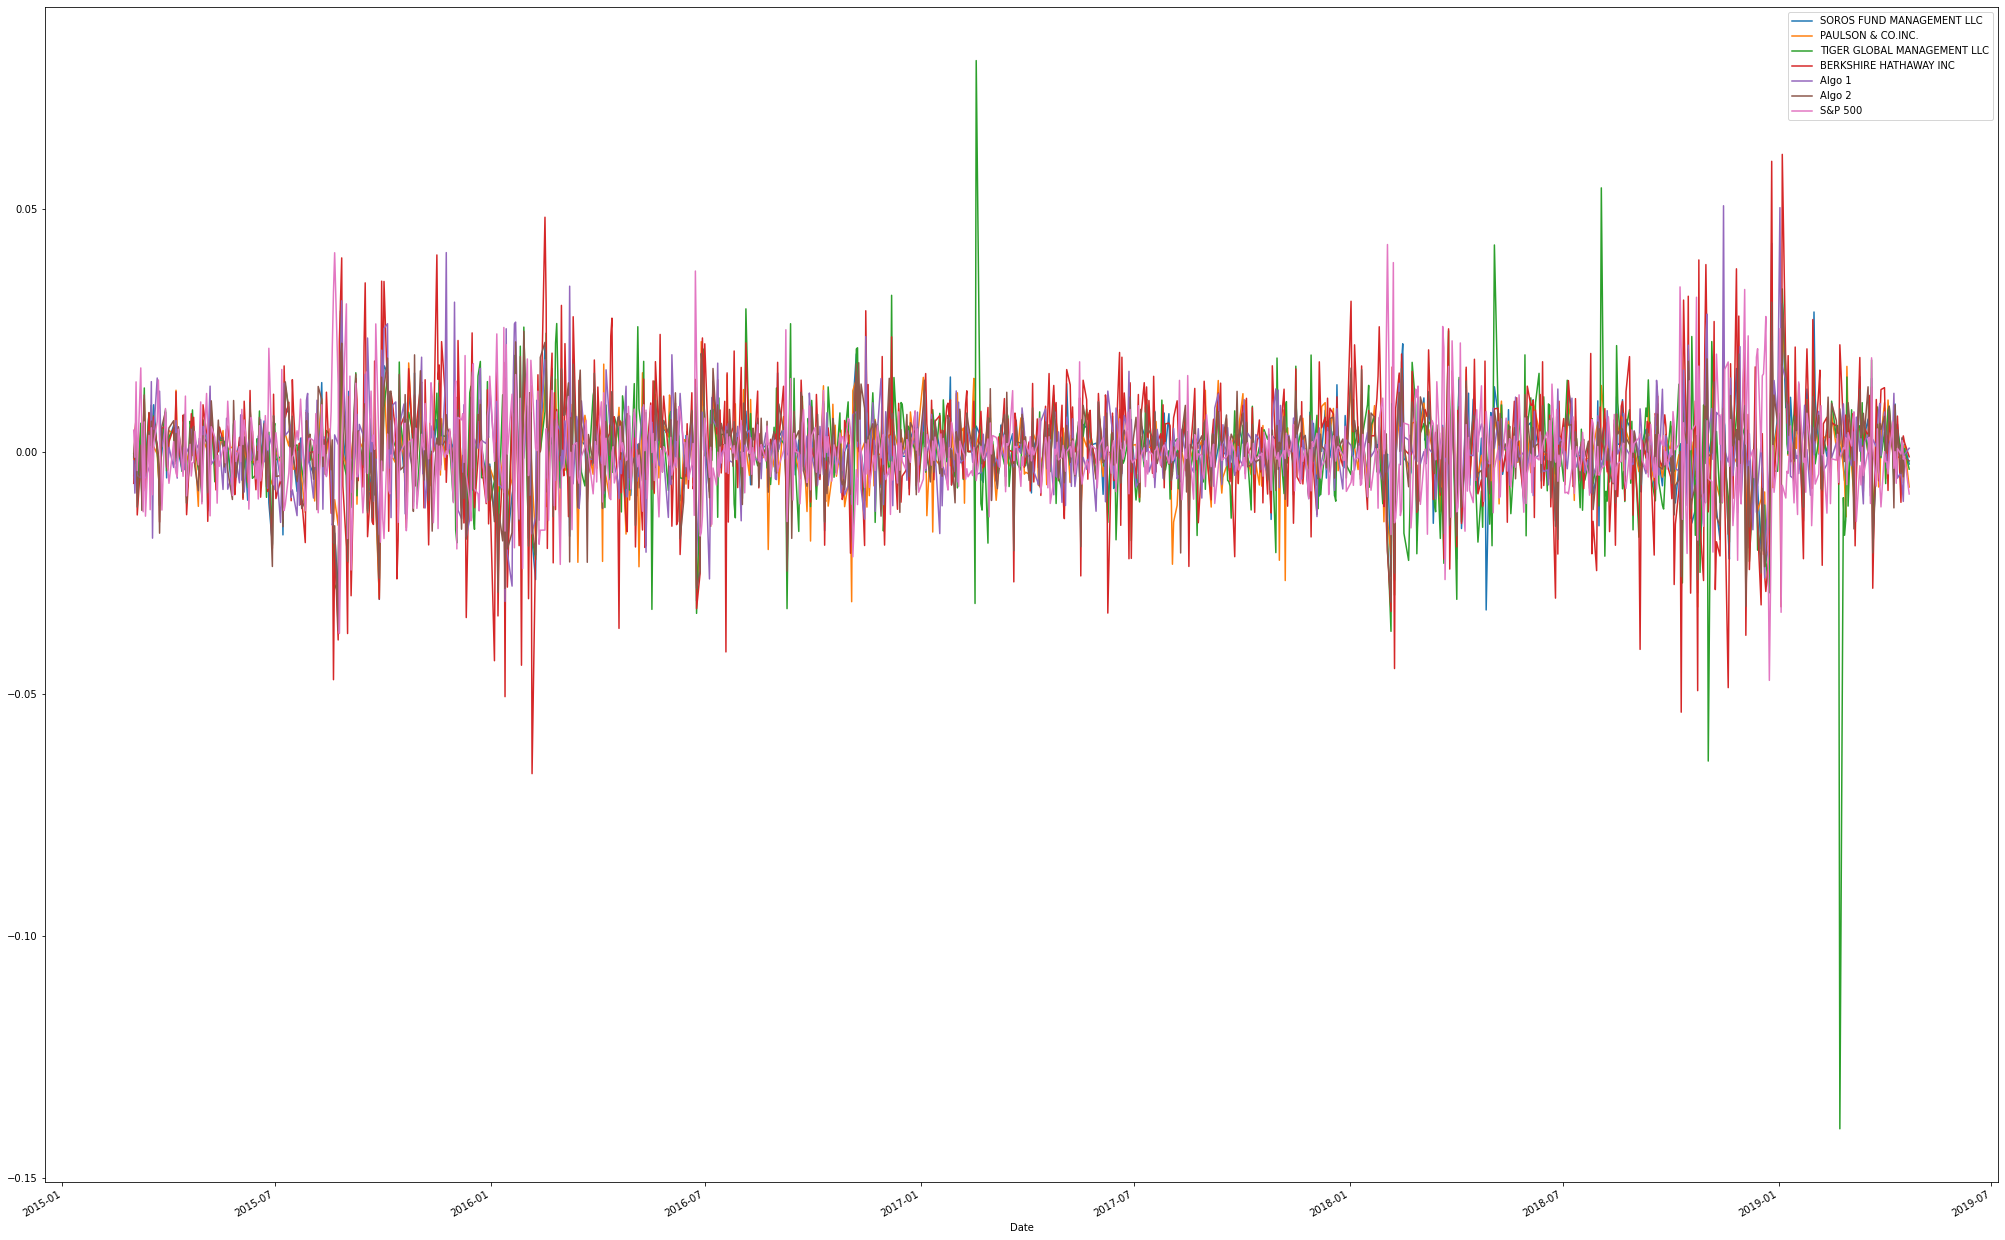

In [273]:
# Plot daily returns of all portfolios
portfolio_returns_df.plot(figsize = (35, 24))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Portfolio Cumulative Returns'}, xlabel='Date'>

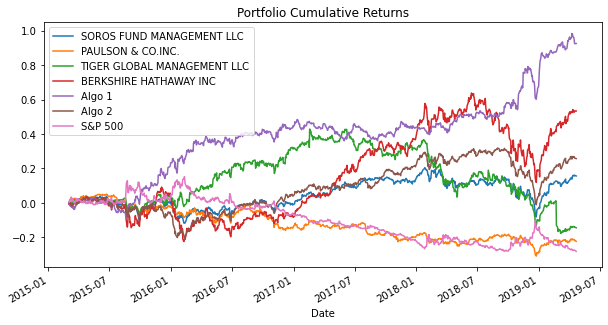

In [275]:
# Calculate cumulative returns of all portfolios
cumulative_return = (1 + portfolio_returns_df).cumprod() - 1

# Plot cumulative returns
cumulative_return.plot(figsize = (10,5), title="Portfolio Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

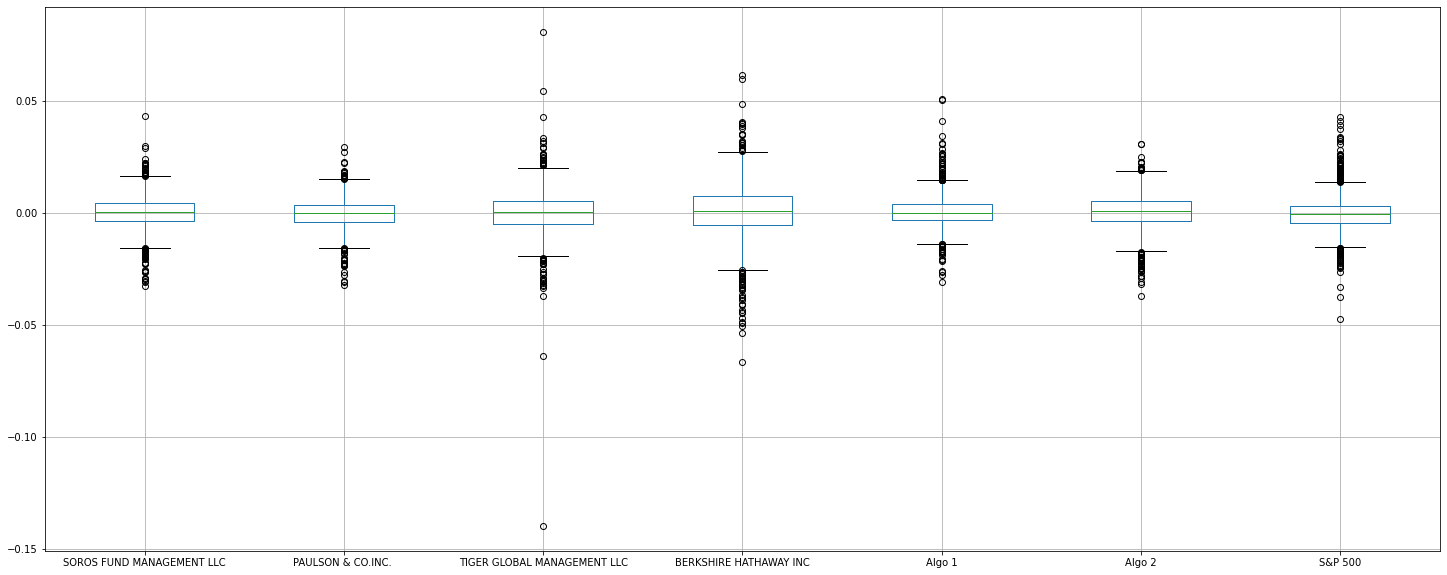

In [279]:
# Box plot to visually show risk
portfolio_returns_df.boxplot(figsize=(25, 10))

### Calculate Standard Deviations

In [280]:
# Calculate the daily standard deviations of all portfolios
whale_std = whale_df.std()
whale_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [281]:
algo_std = algo_df.std()
algo_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [282]:
sp500_std = sp500_df.std()
sp500_std

S&P 500    0.008135
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [283]:
# Calculate  the daily standard deviation of S&P 500
portfolio_std_df = pd.DataFrame(portfolio_returns_df.std()).rename(columns = {0:'Standard Deviation'})
portfolio_std_df

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007896
PAULSON & CO.INC.,0.007026
TIGER GLOBAL MANAGEMENT LLC,0.010897
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007623
Algo 2,0.008341
S&P 500,0.008587


In [284]:
# Determine which portfolios are riskier than the S&P 500
highest_std = portfolio_std_df[portfolio_std_df['Standard Deviation'] > portfolio_std_df.loc['S&P 500','Standard Deviation']]
highest_std

,Standard Deviation
TIGER GLOBAL MANAGEMENT LLC,0.010897
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [286]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolio_std_df*np.sqrt(252)
annualized_std

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.125348
PAULSON & CO.INC.,0.111527
TIGER GLOBAL MANAGEMENT LLC,0.172989
BERKSHIRE HATHAWAY INC,0.205079
Algo 1,0.121006
Algo 2,0.132413
S&P 500,0.136313


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

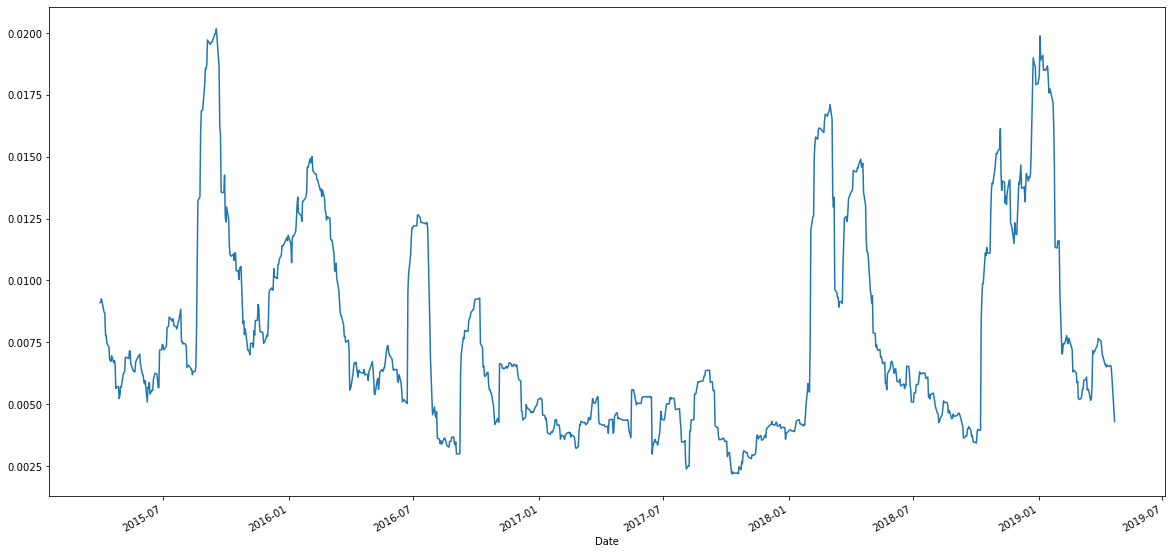

In [291]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std21 = portfolio_returns_df['S&P 500'].rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std21.plot(figsize= (20, 10))

### Calculate and plot the correlation

<AxesSubplot:>

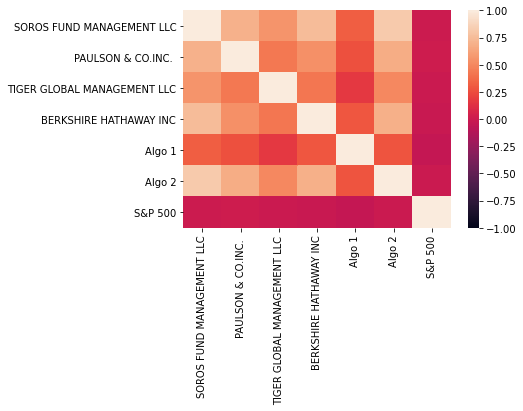

In [296]:
# Calculate the correlation
sp500_corr = pd.DataFrame(portfolio_returns_df.corr()).loc[:,"S&P 500"]
# Display de correlation matrix
sns.heatmap(portfolio_returns_df.corr(), vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'The Rolling 60-day beta for Tiger Global'}, xlabel='Date'>

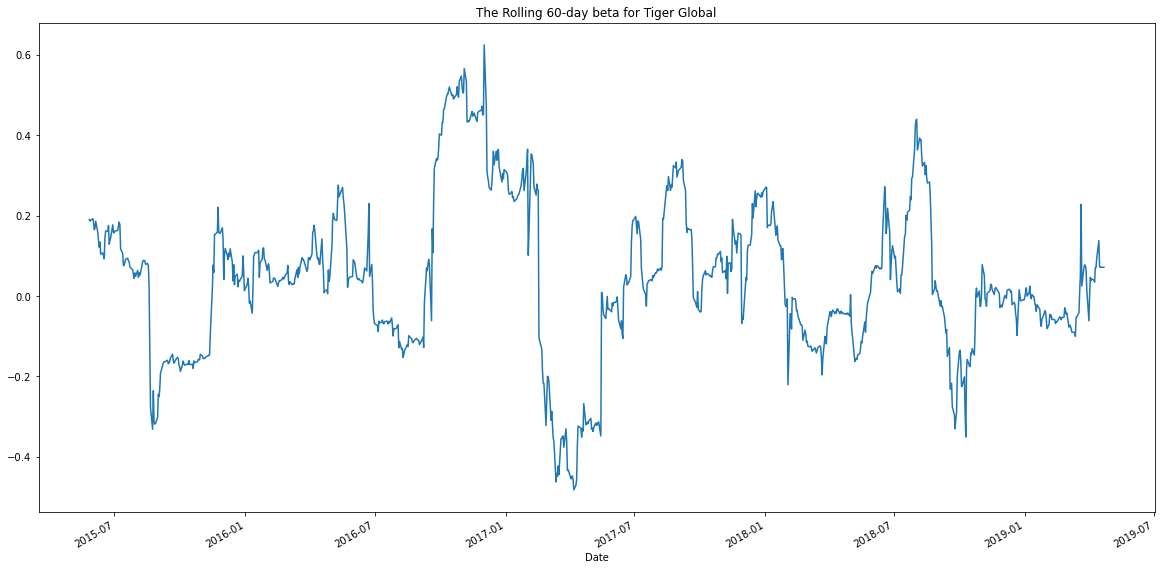

In [297]:
# Calculate covariance of a single portfolio
covariance = portfolio_returns_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(portfolio_returns_df['S&P 500'])
# Calculate variance of S&P 500
variance = portfolio_returns_df['S&P 500'].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20,10), title='The Rolling 60-day beta for Tiger Global')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

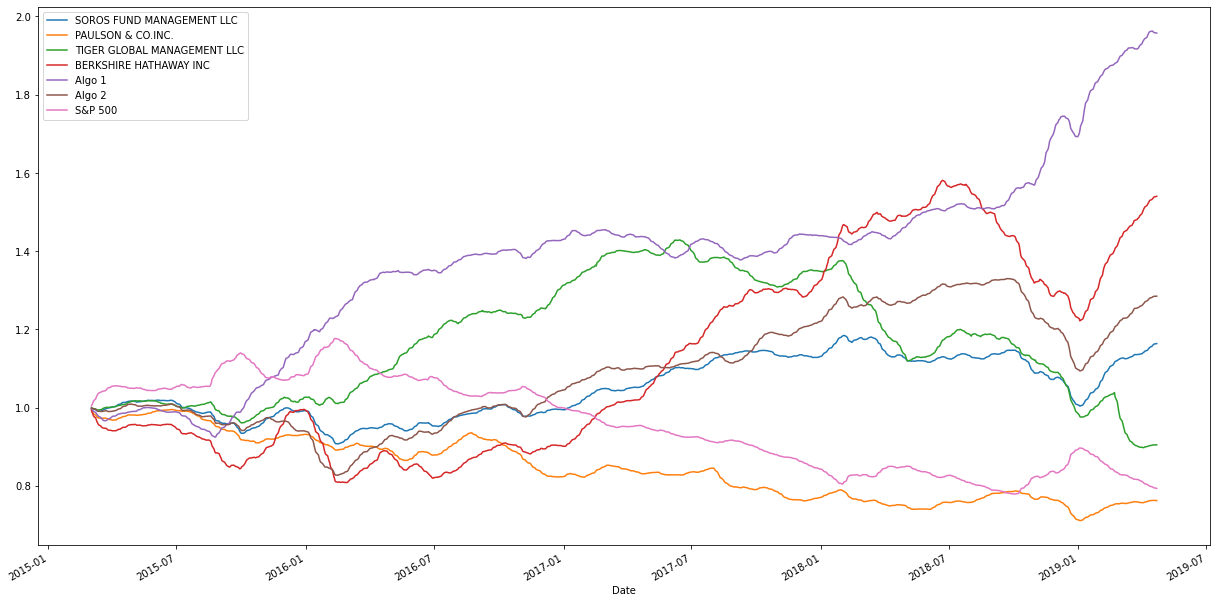

In [298]:
# Use `ewm` to calculate the rolling window

daily_ewm = portfolio_returns_df.ewm(span=21, adjust= False).mean()
(1+daily_ewm).cumprod().plot(figsize= (21,11))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [299]:
# Annualized Sharpe Ratios
annualized_sr = portfolio_returns_df.mean()*252/(portfolio_returns_df.std()*np.sqrt(252))
annualized_sr

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

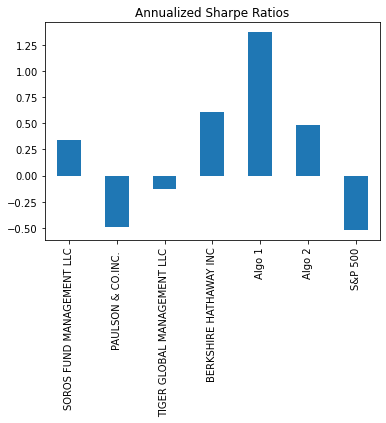

In [300]:
# Visualize the sharpe ratios as a bar plot
annualized_sr.plot(kind = 'bar', title = 'Annualized Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 performed the best in the market and over the other portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [302]:
# Reading data from 1st stock
goog_df = pd.read_csv('files/goog_historical.csv', infer_datetime_format=True,parse_dates=True, index_col="Trade DATE")
goog_df.rename(columns={'NOCP':'GOOG'}, inplace = True)
goog_df = goog_df.drop(columns=['Symbol'])
goog_df.head()

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [303]:
# Reading data from 2nd stock
aapl_df = pd.read_csv('files/aapl_historical.csv', infer_datetime_format=True,parse_dates=True, index_col="Trade DATE")
aapl_df.rename(columns={'NOCP':'AAPL'}, inplace = True)
aapl_df = aapl_df.drop(columns=['Symbol'])
aapl_df.head()

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [304]:
# Reading data from 3rd stock
cost_df = pd.read_csv('files/cost_historical.csv', infer_datetime_format=True,parse_dates=True, index_col="Trade DATE")
cost_df.rename(columns={'NOCP':'COST'}, inplace = True)
cost_df = cost_df.drop(columns=['Symbol'])
cost_df.head()

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [305]:
# Combine all stocks in a single DataFrame
comb_stock_df = pd.concat((goog_df,aapl_df,cost_df), axis=1, join= 'inner')
comb_stock_df.sort_index(inplace = True)
comb_stock_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [310]:
# Reset Date index
comb_stock_df.index = comb_stock_df.index.normalize()
comb_stock_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [311]:
# Calculate daily returns
daily_returns = comb_stock_df.pct_change()
# Drop NAs
daily_returns.dropna(inplace= True)
# Display sample data
daily_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [312]:
# Set weights
weights = [1/3, 1/3, 1/3]
portfolio = comb_stock_df.dot(weights)
# Calculate portfolio return
portfolio_returns = portfolio.pct_change()
portfolio_returns.dropna(inplace=True)
# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.001093
2018-05-15   -0.015550
2018-05-16    0.005140
2018-05-17   -0.002370
2018-05-18   -0.009248
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [313]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat((portfolio_returns, portfolio_returns_df), axis = 1, join = 'inner')
all_returns.rename(columns = {0:'Will Portfolio'}, inplace=True)
all_returns.head()

,Will Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


In [314]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna(inplace=True)
all_returns.head()

,Will Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [315]:
# Calculate the annualized `std`
all_porfolio_std = pd.DataFrame(all_returns.std()*np.sqrt(252)).rename(columns={0:'Standard Deviation'})
all_porfolio_std.head()

,Standard Deviation
Will Portfolio,0.228977
SOROS FUND MANAGEMENT LLC,0.146812
PAULSON & CO.INC.,0.116928
TIGER GLOBAL MANAGEMENT LLC,0.232898
BERKSHIRE HATHAWAY INC,0.247305


### Calculate and plot rolling `std` with 21-day window

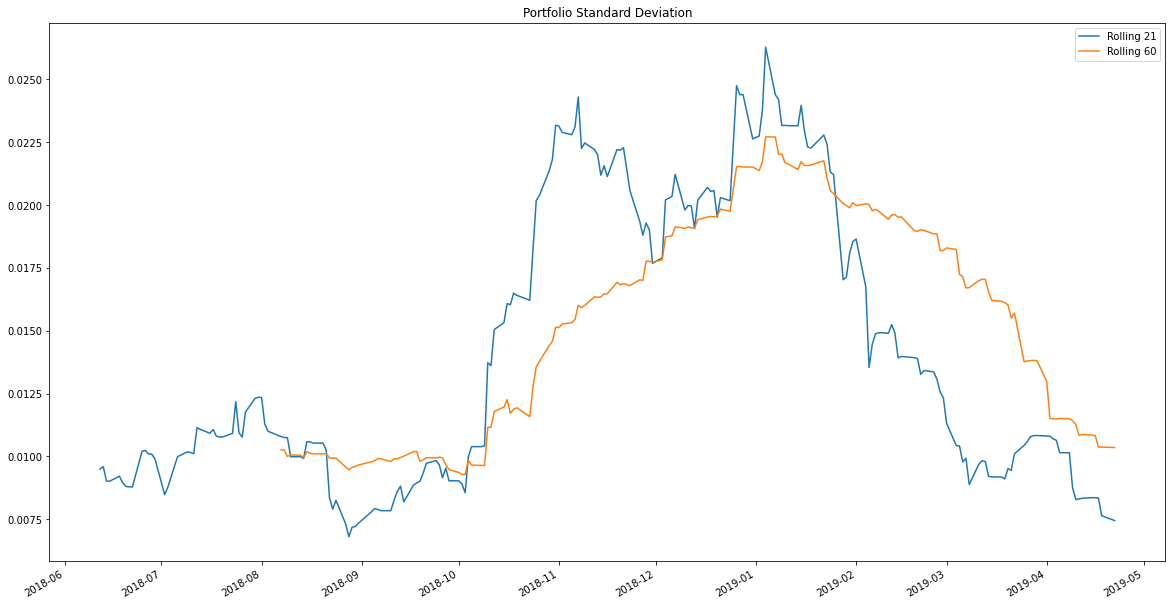

In [324]:
# Calculate rolling standard deviation
rolling_portfolio_21 = all_returns[['Will Portfolio']].rolling(window=21).std()
rolling_portfolio_60 = all_returns[['Will Portfolio']].rolling(window=60).std()
# Plot rolling standard deviation
all_returns_std = rolling_portfolio_21.plot(figsize = (20, 11), title='Portfolio Standard Deviation')
rolling_portfolio_60.plot(ax = all_returns_std)
all_returns_std.legend(['Rolling 21','Rolling 60'])

### Calculate and plot the correlation

<AxesSubplot:>

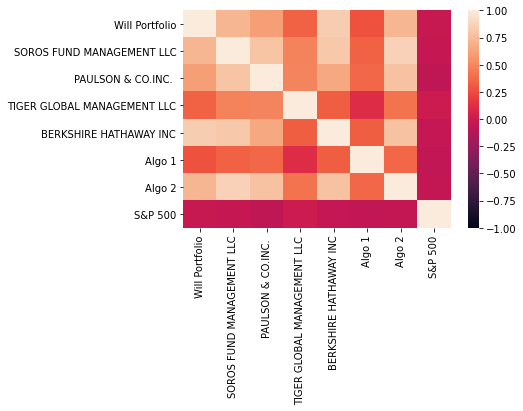

In [318]:
# Calculate and plot the correlation
my_corr = all_returns.corr()
sns.heatmap(my_corr, vmin=-1,vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'My Portfolio Rolling 60-Day beta'}>

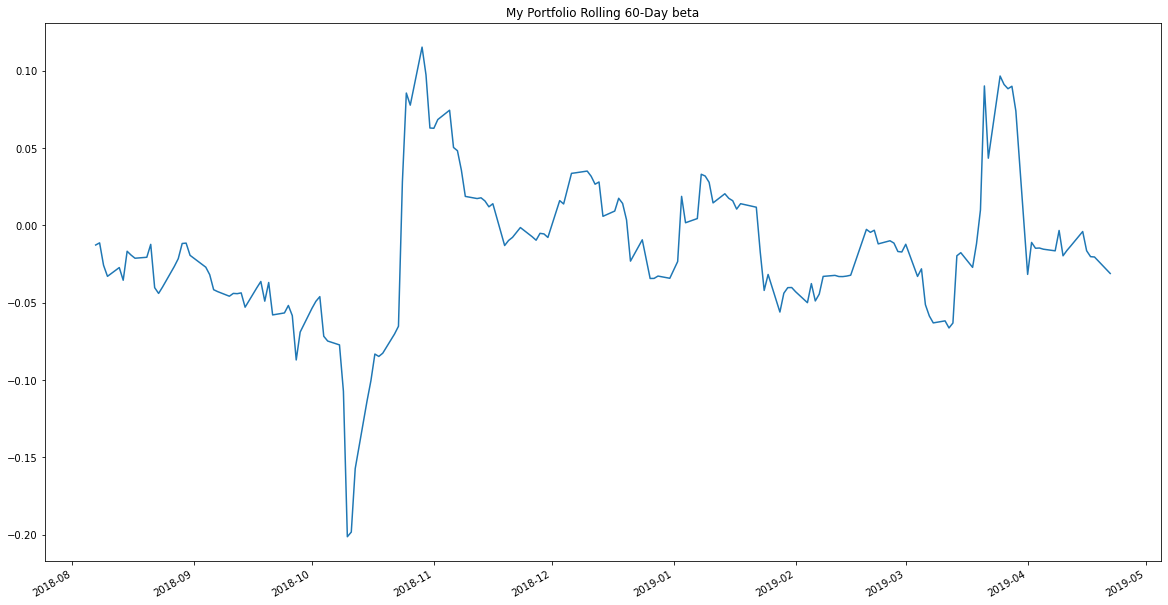

In [319]:
# Calculate and plot Beta
my_covariance = all_returns['Will Portfolio'].rolling(window=60).cov(all_returns['S&P 500'])
my_variance = all_returns['Will Portfolio'].rolling(window=60).var()
my_beta = my_covariance / my_variance
my_beta.plot(figsize=(20, 11), title= 'My Portfolio Rolling 60-Day beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [320]:
# Calculate Annualzied Sharpe Ratios
trade_days = all_returns.count()
my_sr = all_returns.mean()*trade_days/(all_returns.std()*np.sqrt(trade_days))

<AxesSubplot:title={'center':'My Sharpe Ratios'}>

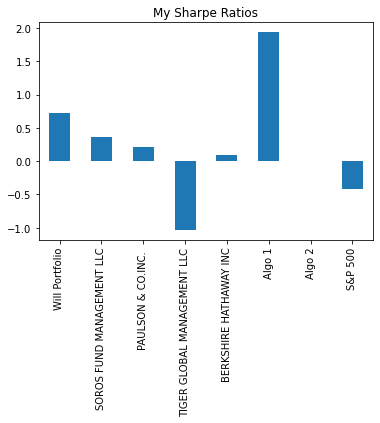

In [321]:
# Visualize the sharpe ratios as a bar plot
my_sr.plot(kind = 'bar', title='My Sharpe Ratios')

### How does your portfolio do?

My portfolio is in second place next to algo 1